In [61]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")

In [62]:
df.shape

(768, 9)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [65]:
# Select categorical columns irrespective of cardinality (convenient for label encoding)
categorical_cols = [cname for cname in df.columns if 
                    df[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

print(categorical_cols)
print(numerical_cols)

[]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [66]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [67]:
pd.set_option('display.float_format', '{:.2f}'.format) # Suppress scientific notations

pd.set_option("display.max_columns", 10) # Display all columns

print(df.describe())

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          19.36          15.95   115.24   7.88   
min           0.00     0.00           0.00           0.00     0.00   0.00   
25%           1.00    99.00          62.00           0.00     0.00  27.30   
50%           3.00   117.00          72.00          23.00    30.50  32.00   
75%           6.00   140.25          80.00          32.00   127.25  36.60   
max          17.00   199.00         122.00          99.00   846.00  67.10   

       DiabetesPedigreeFunction    Age  Outcome  
count                    768.00 768.00   768.00  
mean                       0.47  33.24     0.35  
std                        0.33  11.76     0.48  
min                        0.08  21.00     0.00  
25%                        0.24  24.00     0.00  
50%   

In [68]:
# Let's write a function to print the total percentage of the missing values.
#(this can be a good exercise for beginners to try to write simple functions like this.)

def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [69]:
missing_percentage(df)

,Total,Percent
Outcome,0,0.00
Age,0,0.00
DiabetesPedigreeFunction,0,0.00
BMI,0,0.00
Insulin,0,0.00
SkinThickness,0,0.00
BloodPressure,0,0.00
Glucose,0,0.00
Pregnancies,0,0.00


In [71]:
# Missing value treatment strategies
# from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# df  = df.fillna(0)

# Preprocessing/imputation for numerical data
numerical_imputer = SimpleImputer(strategy='median')
numerical_imputer1 = IterativeImputer(max_iter=10, random_state=0)

# Preprocessing/imputation for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute

# df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
# df[numerical_cols] = numerical_imputer1.fit_transform(df[numerical_cols])

# df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])    

In [72]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


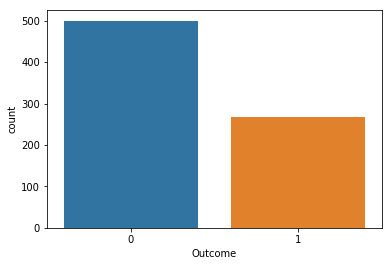

In [73]:
# Plot outcome classes, to check for class imbalance

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Outcome'], label="Count")

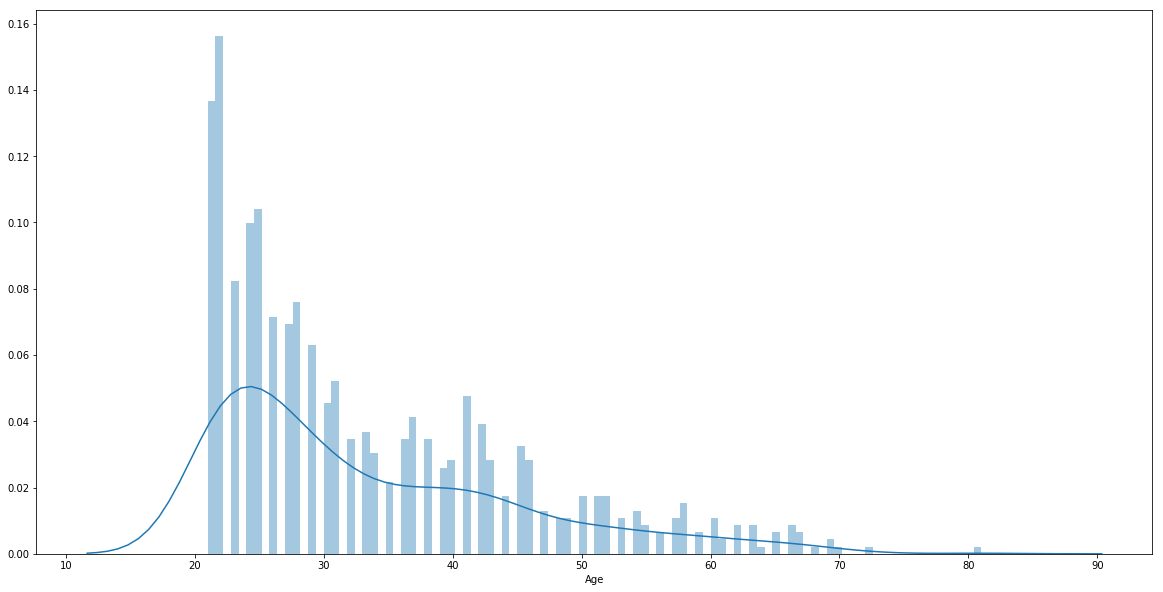

In [74]:
## Let's look at the histogram of 'Age' to check the distribution

plt.subplots(figsize = (20,10),)
sns.distplot(df.Age, bins = 100, kde = True, rug = False, norm_hist=False);

In [75]:
col = list(df.columns)
col.remove("Outcome")
#col.remove("id")

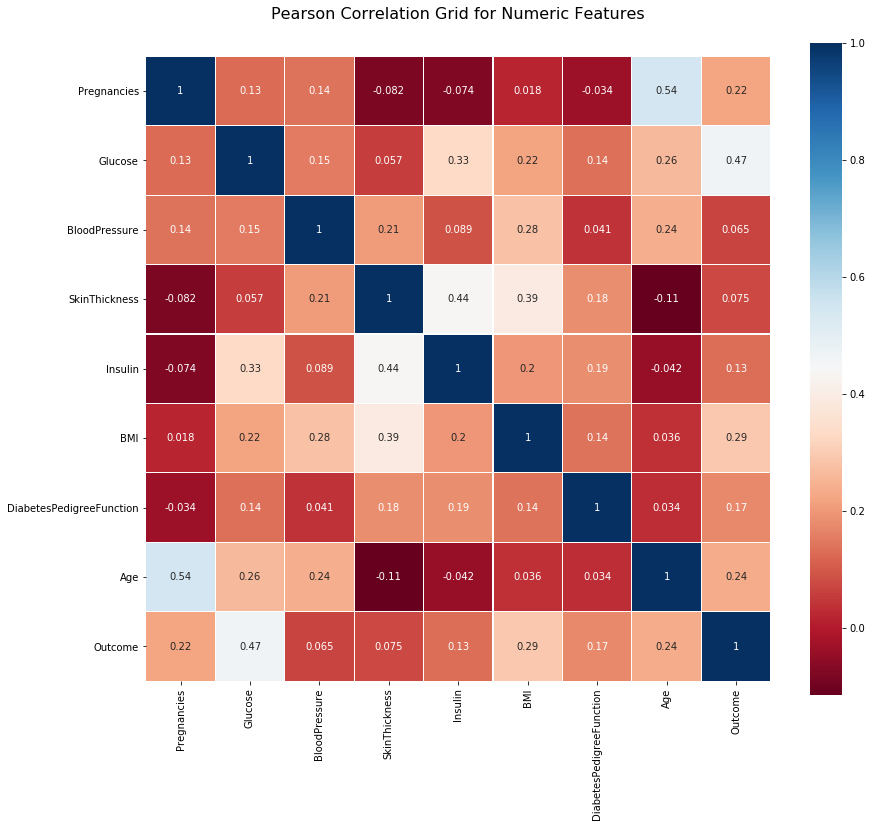

In [76]:
# Correlation among Independent Variables/Features, to see relationships

import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.RdBu

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation Grid for Numeric Features', y=1.05, size=16)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

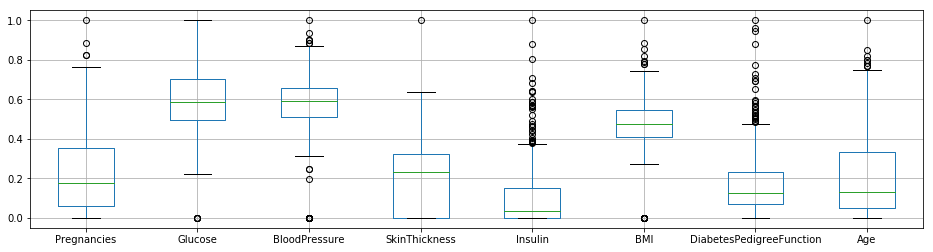

In [77]:
#Generate boxplots for all the numeric variables to compare side by side, and check for outliers

from sklearn.preprocessing import MinMaxScaler

#df1 = df[numerical_cols]

x = df[col].values #returns a numpy array

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_scaled = min_max_scaler.fit_transform(x)

df3 = pd.DataFrame(x_scaled, columns = df[col].columns)

boxplot = df3.boxplot(figsize=[16,4])

In [78]:
# Minmax Scaling for better fit after outlier treatment

from sklearn.preprocessing import MinMaxScaler

df1 = df[col].values #returns a numpy array for outlier untreated numeric cols
# x = df1.values #returns a numpy array for outlier treated numeric cols

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

x_scaled = min_max_scaler.fit_transform(x)

df2 = pd.DataFrame(x_scaled, columns = df[col].columns)


In [79]:
X = df[col].values
Y = df[['Outcome']].values

In [80]:
X1 = df2.values
Y1 = df[['Outcome']].values

In [91]:
# Train-Test split

train_x, test_x, train_y,test_y = train_test_split(X, Y, test_size=0.25, random_state=1000)

## Creating Decision Tree
dt = DecisionTreeClassifier(max_depth=None, criterion='entropy', max_features=8, min_impurity_decrease=0.0, random_state=0)

dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [87]:
# Train-Test split on Scaled variables; for comparison of results

train_x, test_x, train_y,test_y = train_test_split(X1, Y1, test_size=0.25, random_state=1000)

## Creating Decision Tree
dt = DecisionTreeClassifier(max_depth=None, criterion='entropy', max_features=8, min_impurity_decrease=0.0, random_state=0)

dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [92]:
# View predicted classes

pred_class = dt.predict(test_x)
pred_prob  = dt.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[0 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [93]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, pred_class)

array([[94, 31],
       [32, 35]], dtype=int64)

In [94]:
# Print out above numbers from 2*2 grid

tn=confusion_matrix(test_y, pred_class)[0,0]
tp=confusion_matrix(test_y, pred_class)[1,1]
fn=confusion_matrix(test_y, pred_class)[1,0]
fp=confusion_matrix(test_y, pred_class)[0,1]

print(tn, fp, fn, tp)

94 31 32 35


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.671875
0.5303030303030303
0.5223880597014925


In [96]:
#RoC Value

from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_prob[0:,1:])

0.6371940298507462

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(dt.feature_importances_, col), reverse=True), columns=['Value','Feature'])


In [98]:
# Feature Importance table
feature_imp

,Value,Feature
0,0.26,Glucose
1,0.17,DiabetesPedigreeFunction
2,0.17,BMI
3,0.14,Age
4,0.09,BloodPressure
5,0.07,SkinThickness
6,0.06,Pregnancies
7,0.04,Insulin


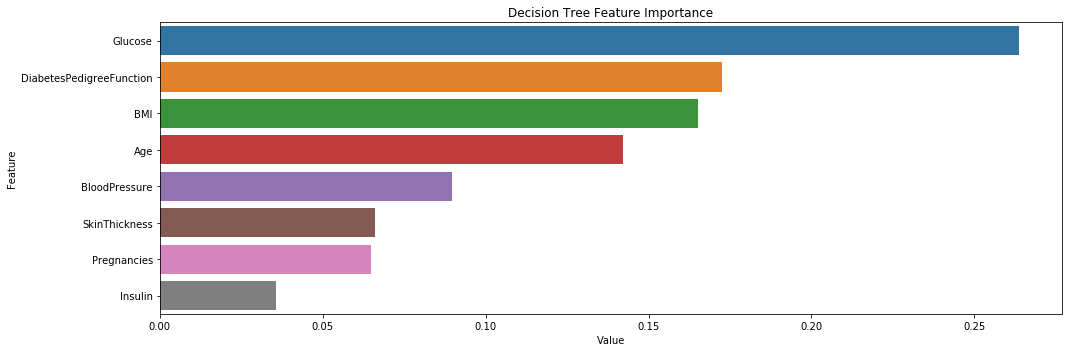

In [99]:
# Feature Importance plot
plt.figure(figsize=(15, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

In [100]:
train_x, test_x, train_y,test_y = train_test_split(X, Y, test_size=0.30,random_state=1000)

out=[]
from sklearn.metrics import confusion_matrix,recall_score, precision_score

## Creating Decision Tree

for i in range(2,11):
    pt = DecisionTreeClassifier(max_depth=i,criterion='gini',random_state=0)
    pt.fit(train_x,train_y)
#  print("depth "+str(i))
    pred_class = pt.predict(test_x)
    pred_prob  = pt.predict_proba(test_x)
    con=confusion_matrix(test_y, pred_class)
    
    acc=accuracy_score(test_y, pred_class)
    pr =precision_score(test_y, pred_class)
    recall =recall_score(test_y, pred_class)
    auc=roc_auc_score(test_y, pred_prob[0:,1:])
    
    out.append((i,con[0,0],con[0,1],con[1,0],con[1,1],acc, pr, recall, auc))
    
pd.DataFrame(out,columns=["depth","tn","tp","fn","fp","acc","pr","rec","auc"])


,depth,tn,tp,fn,fp,acc,pr,rec,auc
0,2,116,30,35,50,0.72,0.62,0.59,0.72
1,3,113,33,31,54,0.72,0.62,0.64,0.76
2,4,115,31,41,44,0.69,0.59,0.52,0.74
3,5,118,28,44,41,0.69,0.59,0.48,0.74
4,6,109,37,35,50,0.69,0.57,0.59,0.69
5,7,107,39,30,55,0.70,0.59,0.65,0.70
6,8,117,29,45,40,0.68,0.58,0.47,0.65
7,9,116,30,40,45,0.70,0.60,0.53,0.67
8,10,110,36,40,45,0.67,0.56,0.53,0.64


In [109]:
# Feature Scaling for faster and better convergence; using standardscaler to transform

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_xs = sc.fit_transform(train_x)
## transforming "test_x"
test_xs = sc.transform(test_x)
## transforming "test_x"
X_s = sc.transform(X)

In [28]:
out=[]
from sklearn.metrics import confusion_matrix,recall_score, precision_score
## Creating Decision Tree
for i in range(2,11):
    pt = DecisionTreeClassifier(max_depth=i,criterion='gini',random_state=0)
    pt.fit(train_xs,train_y)
    
#  print("depth "+str(i))
    pred_class = pt.predict(test_xs)
    pred_prob  = pt.predict_proba(test_xs)
    con=confusion_matrix(test_y, pred_class)
    
    acc=accuracy_score(test_y, pred_class)
    pr =precision_score(test_y, pred_class)
    recall =recall_score(test_y, pred_class)
    auc=roc_auc_score(test_y, pred_prob[0:,1:])
    
    out.append((i,con[0,0],con[0,1],con[1,0],con[1,1],acc, pr, recall, auc))
    
pd.DataFrame(out,columns=["depth","tn","tp","fn","fp","acc","pr","rec","auc"])

,depth,tn,tp,fn,fp,acc,pr,rec,auc
0,2,116,30,35,50,0.72,0.62,0.59,0.72
1,3,113,33,31,54,0.72,0.62,0.64,0.76
2,4,115,31,41,44,0.69,0.59,0.52,0.74
3,5,118,28,44,41,0.69,0.59,0.48,0.74
4,6,109,37,35,50,0.69,0.57,0.59,0.69
5,7,107,39,29,56,0.71,0.59,0.66,0.71
6,8,117,29,46,39,0.68,0.57,0.46,0.64
7,9,116,30,41,44,0.69,0.59,0.52,0.66
8,10,110,36,40,45,0.67,0.56,0.53,0.64


In [101]:
# Build and fit Logistic Regression model, with/without timer; to try out covergence tuning using loss function and iterations

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

#class_weights = {0: 1, 1: 4}

LR = make_pipeline(RobustScaler(), LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                                       intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                                                       max_iter=300, multi_class='auto', verbose=0, warm_start=False, n_jobs=1, 
                                                       l1_ratio=None))

#solver='liblinear', 'lbfgs'
LR_model = LR.fit(train_x, train_y.ravel())

LR_model

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=1, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [102]:
pred_class = LR_model.predict(test_x)
pred_prob  = LR_model.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[0 1 0 1]
[[0.93294145 0.06705855]
 [0.4489892  0.5510108 ]
 [0.9566134  0.0433866 ]
 [0.08249625 0.91750375]]


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_class)

array([[128,  18],
       [ 37,  48]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.7619047619047619
0.7272727272727273
0.5647058823529412


In [105]:
%%time

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

# C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
# Effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

# Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

# Choosing the solver/ loss optimizer
solver = ['liblinear', 'saga']

# Choose a cross validation strategy 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .33)

# Setting param for param_grid in GridSearchCV 
param = {'penalty': penalties, 'C': C_vals, 'solver': solver}


# Calling on GridSearchCV object 
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid = param,
                    scoring = 'accuracy',
                    n_jobs =-1,
                    cv = cv)

# Fitting the model
grid.fit(X, Y.ravel())

Wall time: 8.01 s


In [106]:
# Getting the best of everything 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7807086614173229
{'C': 12, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [107]:
# Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,Y)

0.7825520833333334

In [110]:
%%time

# Grid Search with Support Vector Classifier (SVC); does not work without scaling

from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5,10] # Penalty parameter C for the error term. 

gammas = [0.0001,0.001, 0.01, 0.1, 1] # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

kernels = ['rbf', 'linear', 'sigmoid'] # Specifies the kernel type to be used in the algorithm.

param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid_search = GridSearchCV(SVC(probability=True), 
                           param_grid, 
                           n_jobs =-1,
                           cv=cv)

grid_search.fit(X_s, Y.ravel())

Wall time: 13.6 s


In [111]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7807086614173229
{'C': 12, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [113]:
# Using the best parameters from the grid-search.
svc_grid = grid.best_estimator_
svc_grid.score(X, Y)

0.7825520833333334

In [114]:
# Build and fit Gradient Boosting Classifier model, with timer; to try out covergence tuning using loss function and iterations

from sklearn.ensemble import GradientBoostingClassifier

#class_weights = {0: 1, 1: 3}

gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0, criterion='friedman_mse', 
                                 min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=2, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features='auto', 
                                 verbose=0, max_leaf_nodes=None, validation_fraction=0.1, n_iter_no_change=5, tol=0.0001)


GBC_model = gbc.fit(train_xs, train_y.ravel())

GBC_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=5, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
pred_class = GBC_model.predict(test_xs)
pred_prob  = GBC_model.predict_proba(test_xs)
print(pred_class[0:4])
print(pred_prob[0:4])

[0 1 0 1]
[[0.90313909 0.09686091]
 [0.46645596 0.53354404]
 [0.92961478 0.07038522]
 [0.17510253 0.82489747]]


In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_class)

array([[131,  15],
       [ 38,  47]], dtype=int64)

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.7705627705627706
0.7580645161290323
0.5529411764705883


In [123]:
%%time
# GradientBoosting Classifier GridSearch

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [100,150,200,225,250];
max_depth = range(1,4);
criterions = ['friedman_mse']; #mae];
loss = ['deviance']; #'exponential'];
learning_rates = [0.05, 0.1, 0.15, 0.2];

cv = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=0)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion':criterions,
              'loss':loss,
              'learning_rate':learning_rates
             }

grid = GridSearchCV(estimator=GradientBoostingClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)

grid.fit(X, Y.ravel()) 

Wall time: 6.08 s


In [124]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7861471861471861
{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 1, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [125]:
gbc_grid = grid.best_estimator_
gbc_grid.score(X, Y)

0.7825520833333334

In [126]:
%%time
# Random Forest GridSearch

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100,150,175,200,250];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=0)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions 
             }

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)

grid.fit(X, Y.ravel()) 

Wall time: 1min 4s


In [127]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7796536796536796
{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 175}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [128]:
rf_grid = grid.best_estimator_
rf_grid.score(X, Y)

0.95703125

In [129]:
## Final feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = col,
                                   columns=['importance'])

feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Glucose,0.29
BMI,0.17
Age,0.14
DiabetesPedigreeFunction,0.11
Pregnancies,0.08
Insulin,0.07
BloodPressure,0.07
SkinThickness,0.06
